In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
df = pd.read_excel('Online Retail Data Set.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [27]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [29]:
#given CustomerID null and we can not fill that data
#moreover we have enough data, so we can just drop them
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [30]:
df.duplicated().sum()

5225

In [31]:
df=df.drop_duplicates()

In [32]:
df.duplicated().sum()

0

In [33]:
string_lengths = df.StockCode.str.len().unique()
string_lengths

array([ 6., nan,  4.,  7.,  1.,  2., 12.,  3.])

In [34]:
df[(df.StockCode.str.len())<5].sort_values(by='StockCode').head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
427576,573391,C2,CARRIAGE,1,2011-10-30 14:57:00,50.0,14911.0,EIRE
475573,576904,C2,CARRIAGE,1,2011-11-17 09:25:00,50.0,14931.0,Channel Islands
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911.0,EIRE
220180,556126,C2,CARRIAGE,1,2011-06-09 10:23:00,50.0,14911.0,EIRE
42332,539984,C2,CARRIAGE,1,2010-12-23 14:58:00,50.0,14911.0,EIRE
220671,556206,C2,CARRIAGE,1,2011-06-09 13:46:00,50.0,14911.0,EIRE
476327,577009,C2,CARRIAGE,1,2011-11-17 12:05:00,50.0,12749.0,United Kingdom
101857,544934,C2,CARRIAGE,1,2011-02-25 09:01:00,50.0,13345.0,United Kingdom
216938,555858,C2,CARRIAGE,1,2011-06-07 14:12:00,50.0,14911.0,EIRE
392577,570700,C2,CARRIAGE,1,2011-10-12 09:29:00,50.0,14156.0,EIRE


In [35]:
df = df.drop(df[(df.StockCode.str.len())<5].index).reset_index(drop=True)
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,399701.0,399701,399701,399701.000000,399701,399701.000000,399701.000000,399701
unique,21799.0,3677,3889,NaN,NaN,NaN,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,541.0,2065,2058,NaN,NaN,NaN,NaN,356122
mean,NaN,NaN,NaN,12.229046,2011-07-10 12:36:15.933209856,2.907783,15288.686215,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:07:00,1.250000,13959.000000,NaN
50%,NaN,NaN,NaN,5.000000,2011-07-29 15:51:00,1.950000,15152.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 12:03:00,3.750000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,NaN


<Axes: ylabel='Quantity'>

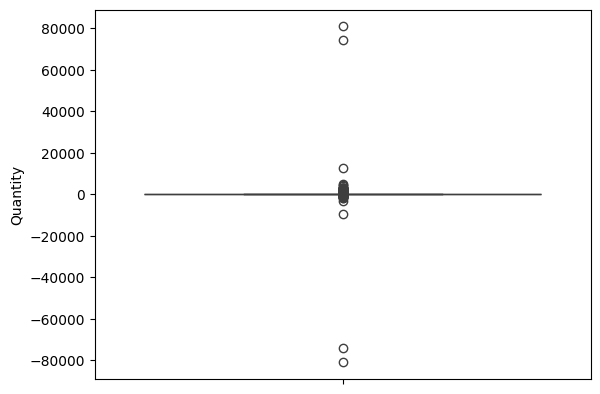

In [36]:
df.CustomerID = df.CustomerID.astype('Int64')
#check the distribution of values in the Quantity column
sns.boxplot(y = 'Quantity', data = df)

In [37]:
df[abs(df.Quantity) > 4000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3034,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
37341,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
37346,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
144390,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom
310546,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom
372413,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom
399234,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
399235,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


In [38]:
df = df.drop(df[df.Quantity==12540].index).reset_index(drop=True)

In [43]:
# Let's see how many records with a negative value in the Quantity column and write them to a separate dataframe df_new
df_new = df[df.Quantity < 0]
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
233,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
234,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
235,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
236,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
399260,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom
399261,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
399509,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
399510,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [44]:
# For the main analysis, we will create a new dataframe with a product count of more than 0 and will not take canceled orders
df_new1 = df[(df.Quantity > 0) | ((df.InvoiceNo.str.len())==5)]
df_new1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
399695,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
399696,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
399697,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
399698,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [45]:
# Let's add new columns Month, Year for further analysis in the context of the year
df_new1['Month']=df_new1.InvoiceDate.dt.month.astype('Int64')
df_new1['Year']=df_new1.InvoiceDate.dt.year.astype('Int64')
# let's add the Amount column with the total amount
df_new1['Amount']=df_new1.Quantity * df_new1.UnitPrice

/tmp/ipykernel_3685184/1679925003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['Month']=df_new1.InvoiceDate.dt.month.astype('Int64')
/tmp/ipykernel_3685184/1679925003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['Year']=df_new1.InvoiceDate.dt.year.astype('Int64')
/tmp/ipykernel_3685184/1679925003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [46]:
df_new1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Month,Year,Amount
count,391194.000000,391194,391194.000000,391194.0,391194.0,391194.0,391194.000000
mean,13.147270,2011-07-10 19:38:00.388962816,2.874471,15295.078102,7.602504,2010.934628,22.335191
min,1.000000,2010-12-01 08:26:00,0.000000,12346.0,1.0,2010.0,0.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13969.0,5.0,2011.0,4.950000
50%,6.000000,2011-07-31 12:08:00,1.950000,15158.0,8.0,2011.0,11.900000
75%,12.000000,2011-10-20 12:57:00,3.750000,16794.0,11.0,2011.0,19.800000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.0,12.0,2011.0,168469.600000
std,180.798897,NaN,4.285061,1710.348416,3.414905,0.247181,310.915025


In [47]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391194 entries, 0 to 399699
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391194 non-null  object        
 1   StockCode    391194 non-null  object        
 2   Description  391194 non-null  object        
 3   Quantity     391194 non-null  int64         
 4   InvoiceDate  391194 non-null  datetime64[ns]
 5   UnitPrice    391194 non-null  float64       
 6   CustomerID   391194 non-null  Int64         
 7   Country      391194 non-null  object        
 8   Month        391194 non-null  Int64         
 9   Year         391194 non-null  Int64         
 10  Amount       391194 non-null  float64       
dtypes: Int64(3), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.9+ MB


/tmp/ipykernel_3685184/4045476961.py:2: FutureWarning: The provided callable <function sum at 0x7f6d96ec5c60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_1 = pd.pivot_table(df_new1,


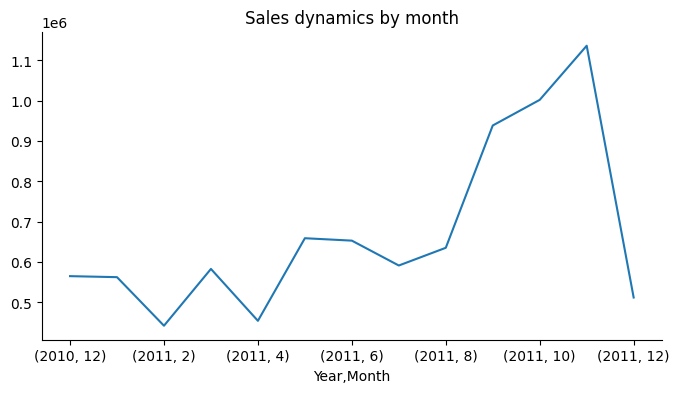

In [49]:
# Let's create a summary table to analyze the dynamics of sales by month
df_1 = pd.pivot_table(df_new1,
               index=["Year", "Month"],
               values=["Amount"],
               aggfunc=np.sum)
df_1['Amount'].plot(kind='line', figsize=(8, 4), title='Sales dynamics by month')
plt.gca().spines[['top', 'right']].set_visible(False)

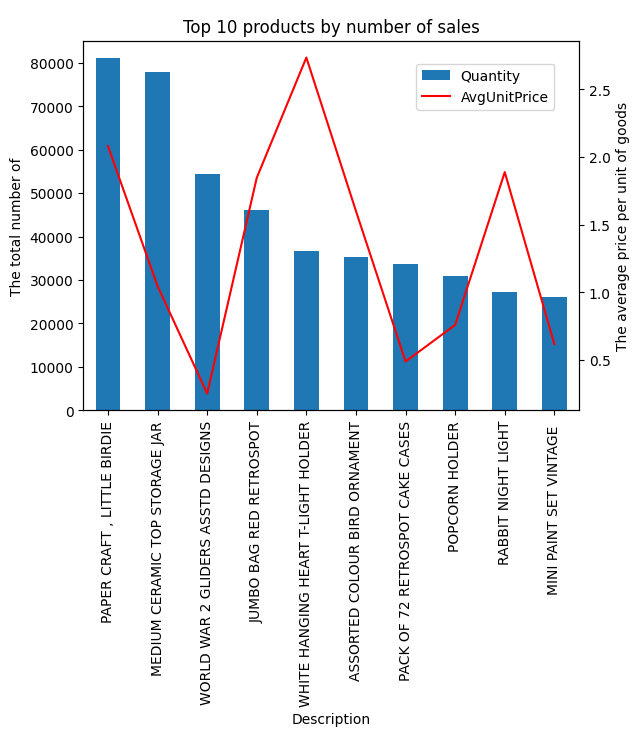

In [50]:
#top 10 products by no of sale
Top10Qty = df_new1.groupby('Description',as_index=False)[['Quantity', 'Amount']].sum().sort_values(by='Quantity',
                                                                                               ascending=False).head(10)
Top10Qty['AvgUnitPrice'] = Top10Qty.Amount/Top10Qty.Quantity

ax = Top10Qty.plot(x="Description", y="Quantity", legend=False,kind='bar')
ax2 = ax.twinx()
Top10Qty.plot(x="Description", y="AvgUnitPrice", ax=ax2, legend=False, color="r")
ax.figure.legend(loc=(.65,.85))
plt.title('Top 10 products by number of sales')
ax.set_ylabel('The total number of')
ax2.set_ylabel('The average price per unit of goods')
plt.show()

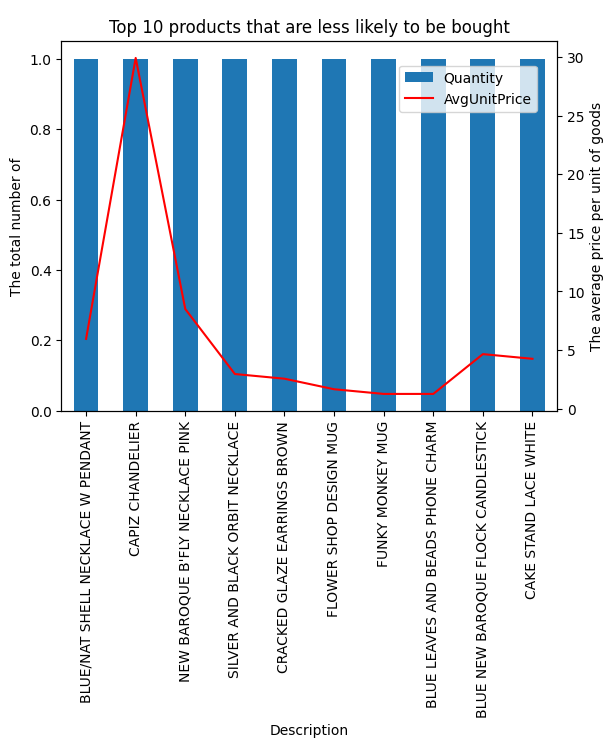

In [52]:
#top 10 products that are less sold
AntiTop10Qty = df_new1.groupby('Description',as_index=False)[['Quantity','Amount']].sum().sort_values(by='Quantity').head(10)
AntiTop10Qty['AvgUnitPrice'] = AntiTop10Qty.Amount/AntiTop10Qty.Quantity

ax = AntiTop10Qty.plot(x="Description", y="Quantity", legend=False,kind='bar')
ax2 = ax.twinx()
AntiTop10Qty.plot(x="Description", y="AvgUnitPrice", ax=ax2, legend=False, color="r")
ax.figure.legend(loc=(.65,.85))
plt.title('Top 10 products that are less likely to be bought')
ax.set_ylabel('The total number of')
ax2.set_ylabel('The average price per unit of goods')
plt.show()

In [53]:
# top 10 revenue products
top_10_product = df_new1[['Description', 'Amount',]].groupby('Description').sum().sort_values('Amount', ascending=False).head(10)

top_10_product.style.bar(align='mid', color='green')

,Amount
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.600000
REGENCY CAKESTAND 3 TIER,142264.750000
WHITE HANGING HEART T-LIGHT HOLDER,100392.100000
JUMBO BAG RED RETROSPOT,85040.540000
MEDIUM CERAMIC TOP STORAGE JAR,81416.730000
PARTY BUNTING,68785.230000
ASSORTED COLOUR BIRD ORNAMENT,56413.030000
RABBIT NIGHT LIGHT,51251.240000
CHILLI LIGHTS,46265.110000


In [54]:
#top 10 products that brings less revenue
antitop_10_product = df_new1[['Description', 'Amount',]].groupby('Description').sum().sort_values('Amount').head(10)

antitop_10_product.style.bar(align='mid', color='yellow')

,Amount
Description,
HEN HOUSE W CHICK IN NEST,0.420000
SET 12 COLOURING PENCILS DOILEY,0.650000
VINTAGE BLUE TINSEL REEL,0.840000
PURPLE FRANGIPANI HAIRCLIP,0.850000
PINK CRYSTAL GUITAR PHONE CHARM,0.850000
CAT WITH SUNGLASSES BLANK CARD,0.950000
HAPPY BIRTHDAY CARD TEDDY/CAKE,0.950000
60 GOLD AND SILVER FAIRY CAKE CASES,1.100000
RUBY GLASS CLUSTER EARRINGS,1.250000


In [55]:
# top countries by sale
df_top_country_Quantity = df_new1[['Country', 'Quantity', 'Amount']].groupby('Country').sum().sort_values('Amount', ascending=False).head(10)
df_top_country_Quantity

df_top_country_Quantity.style.bar(align='mid', color='green')

,Quantity,Amount
Country,,
United Kingdom,4234512,7243020.321000
Netherlands,200834,283889.340000
EIRE,140283,257013.120000
Germany,118033,205381.150000
France,110594,183801.940000
Australia,84198,138103.810000
Spain,27735,55706.560000
Switzerland,29981,52441.950000
Japan,26016,37416.370000


In [56]:
# top countries in returns of goods
df_new_refund = df_new[['Country', 'Quantity']].groupby('Country').sum().sort_values('Quantity').head(10)
df_new_refund

df_new_refund.style.bar(align='mid', color='red')

,Quantity
Country,
United Kingdom,-254445
EIRE,-4191
Germany,-1798
France,-1578
USA,-1424
Spain,-1124
Japan,-795
Australia,-555
Sweden,-443


In [57]:
# top products are returned the most in terms of quantity
df_new2 = df_new[['Description', 'Quantity']].groupby('Description').sum().sort_values('Quantity').head(10)
df_new2

df_new2.style.bar(align='mid', color='red')

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",-80995
MEDIUM CERAMIC TOP STORAGE JAR,-74494
ROTATING SILVER ANGELS T-LIGHT HLDR,-9367
FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150
WHITE HANGING HEART T-LIGHT HOLDER,-2578
GIN + TONIC DIET METAL SIGN,-2030
HERB MARKER BASIL,-1527
FELTCRAFT DOLL MOLLY,-1447
TEA TIME PARTY BUNTING,-1424


In [58]:
# Let's leave the data for the Quantity column with values less than 2000
data = df_new1[df_new1.Quantity < 2000]
df_copy = data[['StockCode','Quantity','UnitPrice','InvoiceDate', 'CustomerID', 'Month', 'Year', 'Amount']]
df_copy

,StockCode,Quantity,UnitPrice,InvoiceDate,CustomerID,Month,Year,Amount
0,85123A,6,2.55,2010-12-01 08:26:00,17850,12,2010,15.30
1,71053,6,3.39,2010-12-01 08:26:00,17850,12,2010,20.34
2,84406B,8,2.75,2010-12-01 08:26:00,17850,12,2010,22.00
3,84029G,6,3.39,2010-12-01 08:26:00,17850,12,2010,20.34
4,84029E,6,3.39,2010-12-01 08:26:00,17850,12,2010,20.34
...,...,...,...,...,...,...,...,...
399695,22613,12,0.85,2011-12-09 12:50:00,12680,12,2011,10.20
399696,22899,6,2.10,2011-12-09 12:50:00,12680,12,2011,12.60
399697,23254,4,4.15,2011-12-09 12:50:00,12680,12,2011,16.60
399698,23255,4,4.15,2011-12-09 12:50:00,12680,12,2011,16.60


In [59]:
df_copy.describe()

,Quantity,UnitPrice,InvoiceDate,CustomerID,Month,Year,Amount
count,391170.000000,391170.000000,391170,391170.0,391170.0,391170.0,391170.000000
mean,12.596955,2.874588,2011-07-10 19:42:18.121328384,15295.088772,7.60259,2010.934629,21.574774
min,1.000000,0.000000,2010-12-01 08:26:00,12347.0,1.0,2010.0,0.000000
25%,2.000000,1.250000,2011-04-07 11:16:00,13969.0,5.0,2011.0,4.950000
50%,6.000000,1.950000,2011-07-31 12:08:00,15157.0,8.0,2011.0,11.900000
75%,12.000000,3.750000,2011-10-20 12:57:00,16794.0,11.0,2011.0,19.800000
max,1992.000000,649.500000,2011-12-09 12:50:00,18287.0,12.0,2011.0,38970.000000
std,37.384393,4.285162,NaN,1710.357673,3.41485,0.247179,91.617676


In [60]:
# The maximum value for the Unit Price column is 649.50 with an average value of 2.88, so we will save a new dataframe with values ranging from 0 to 30, while data loss will not be significant
df_copy1 = df_copy[(df_copy.UnitPrice > 0) & (df_copy.UnitPrice < 30)]
df_copy1

,StockCode,Quantity,UnitPrice,InvoiceDate,CustomerID,Month,Year,Amount
0,85123A,6,2.55,2010-12-01 08:26:00,17850,12,2010,15.30
1,71053,6,3.39,2010-12-01 08:26:00,17850,12,2010,20.34
2,84406B,8,2.75,2010-12-01 08:26:00,17850,12,2010,22.00
3,84029G,6,3.39,2010-12-01 08:26:00,17850,12,2010,20.34
4,84029E,6,3.39,2010-12-01 08:26:00,17850,12,2010,20.34
...,...,...,...,...,...,...,...,...
399695,22613,12,0.85,2011-12-09 12:50:00,12680,12,2011,10.20
399696,22899,6,2.10,2011-12-09 12:50:00,12680,12,2011,12.60
399697,23254,4,4.15,2011-12-09 12:50:00,12680,12,2011,16.60
399698,23255,4,4.15,2011-12-09 12:50:00,12680,12,2011,16.60


In [61]:
df_copy1.describe()

,Quantity,UnitPrice,InvoiceDate,CustomerID,Month,Year,Amount
count,390735.000000,390735.000000,390735,390735.0,390735.0,390735.0,390735.000000
mean,12.605116,2.796917,2011-07-10 20:55:49.929594112,15295.092756,7.603803,2010.934667,21.360161
min,1.000000,0.001000,2010-12-01 08:26:00,12347.0,1.0,2010.0,0.001000
25%,2.000000,1.250000,2011-04-07 11:30:00,13969.0,5.0,2011.0,4.950000
50%,6.000000,1.950000,2011-07-31 12:43:00,15159.0,8.0,2011.0,11.900000
75%,12.000000,3.750000,2011-10-20 13:06:00,16794.0,11.0,2011.0,19.800000
max,1992.000000,29.950000,2011-12-09 12:50:00,18287.0,12.0,2011.0,7144.720000
std,37.397404,2.769809,NaN,1710.347555,3.414534,0.247113,66.922049


In [62]:
# correlation analysis

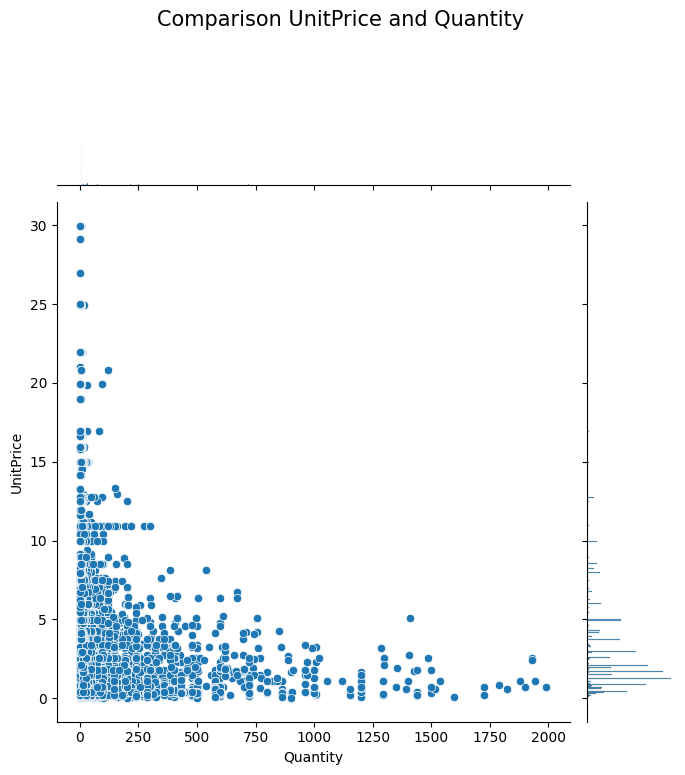

In [63]:
Corr = sns.jointplot(x="Quantity", y="UnitPrice", data = df_copy1, height = 7)
Corr.fig.suptitle("Comparison UnitPrice and Quantity", fontsize = 15, y = 1.1)
plt.show()

In [64]:
# let's calculate Spearman's correlation coefficients for all indicators
df_corr = df_copy1[['Quantity', 'Month', 'Year', 'Amount', 'UnitPrice']].corr(method='spearman')
df_corr

,Quantity,Month,Year,Amount,UnitPrice
Quantity,1.000000,-0.054069,0.027285,0.660549,-0.412230
Month,-0.054069,1.000000,-0.410297,-0.069050,-0.020427
Year,0.027285,-0.410297,1.000000,0.005569,-0.030752
Amount,0.660549,-0.069050,0.005569,1.000000,0.341509
UnitPrice,-0.412230,-0.020427,-0.030752,0.341509,1.000000


<Axes: >

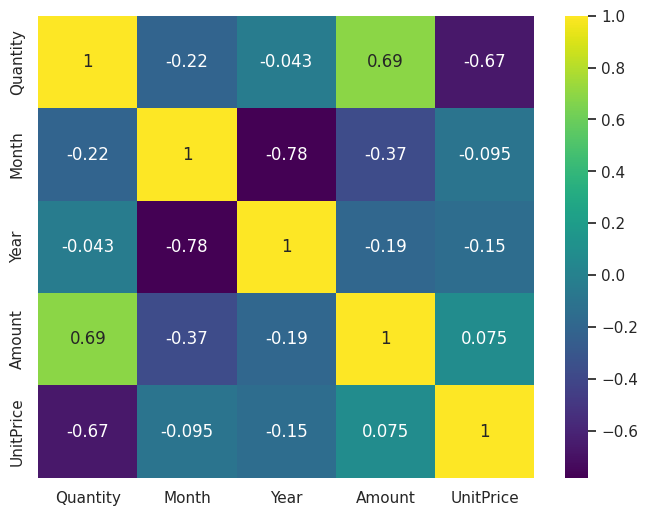

In [65]:
# we visualize it using a heat map
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis')

In [66]:
# creating a dataframe with the three columns we need for the sales forecast
df_reg = df_copy1[['Year','Month','Amount']]
df_reg

,Year,Month,Amount
0,2010,12,15.30
1,2010,12,20.34
2,2010,12,22.00
3,2010,12,20.34
4,2010,12,20.34
...,...,...,...
399695,2011,12,10.20
399696,2011,12,12.60
399697,2011,12,16.60
399698,2011,12,16.60


In [67]:
# let's group the sales volume by month-year
df_pred = df_reg.groupby(['Month','Year']).sum()['Amount'].reset_index()
df_pred

,Month,Year,Amount
0,1,2011,469600.110
1,2,2011,432134.650
2,3,2011,576357.000
3,4,2011,441286.680
4,5,2011,649730.590
5,6,2011,608987.970
6,7,2011,588098.880
7,8,2011,627870.380
8,9,2011,935168.341
9,10,2011,993973.960


In [68]:
# since December is not complete, we will delete the data for December
df_pred = df_pred.drop(index= 12)
df_pred

,Month,Year,Amount
0,1,2011,469600.110
1,2,2011,432134.650
2,3,2011,576357.000
3,4,2011,441286.680
4,5,2011,649730.590
5,6,2011,608987.970
6,7,2011,588098.880
7,8,2011,627870.380
8,9,2011,935168.341
9,10,2011,993973.960


In [71]:
#save this dataframe to train a model 
df_pred.to_csv('month_pred.csv')